# <center>Chips Sales Analysis Task 1: Data Exploration</center>

## Questions

Basic 
- Which are the top 5 stores?
- What are the top 5 products?
- What are the top 5 pack sizes and brands? 
- Which day of week do customers buy chips the most?
- How have chips sales been throughout the months by customer type? 

Complex
- What are the customer distributions based on family status and customer type (customer segment)?
- What are the top product, pack size, and brand in each customer segment? 
- Which customer segment spends the most?
- How many chips are bought per customer segment? And what is the average chips price?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_chips = pd.read_csv(r"C:\Users\thang\OneDrive\Desktop\Chips Analysis\2. Data Sources\Clean\Clean_Chips_Data.csv")

In [72]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264833 entries, 0 to 264832
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Loyalty_Card_Number  264833 non-null  int64  
 1   Family_Status        264833 non-null  object 
 2   Customer_Type        264833 non-null  object 
 3   Date                 264833 non-null  object 
 4   Store_Number         264833 non-null  int64  
 5   Product_Name         264833 non-null  object 
 6   Product_Quantity     264833 non-null  int64  
 7   Total_Sales          264833 non-null  float64
 8   Day_Of_Week          264833 non-null  object 
 9   Pack_Size            264833 non-null  int64  
 10  Brand_Name           264833 non-null  object 
 11  Item_Price           264833 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 24.2+ MB


In [38]:
df_chips = df_chips.astype({'Family_Status':'category','Customer_Type':'category','Day_Of_Week':'category','Brand_Name':'category'}) 
df_chips['Date'] = pd.to_datetime(df_chips['Date'])

In [74]:
df_chips.describe()

Loyalty_Card_Number                           Date  Store_Number  \
count           264,833.00                         264833    264,833.00   
mean            135,548.90  2018-12-30 00:52:39.666657536        135.08   
min               1,000.00            2018-07-01 00:00:00          1.00   
25%              70,021.00            2018-09-30 00:00:00         70.00   
50%             130,357.00            2018-12-30 00:00:00        130.00   
75%             203,094.00            2019-03-31 00:00:00        203.00   
max           2,373,711.00            2019-06-30 00:00:00        272.00   
std              80,580.03                            NaN         76.78   

       Product_Quantity  Total_Sales  Pack_Size  Item_Price  
count        264,833.00   264,833.00 264,833.00  264,833.00  
mean               1.91         7.30     182.43        3.82  
min                1.00         1.50      70.00        1.32  
25%                2.00         5.40     150.00        3.00  
50%                2.00         7.40     170.00        3.80  
75%                2.00         9.20     175.00        4.60  
max                5.00        29.50     380.00        6.50  
std                0.34         2.53      64.33        1.11

In [75]:
df_chips

Loyalty_Card_Number          Family_Status Customer_Type       Date  \
0                      1000  YOUNG SINGLES/COUPLES       Premium 2018-10-17   
1                      1002  YOUNG SINGLES/COUPLES    Mainstream 2018-09-16   
2                      1003         YOUNG FAMILIES        Budget 2019-03-07   
3                      1003         YOUNG FAMILIES        Budget 2019-03-08   
4                      1004  OLDER SINGLES/COUPLES    Mainstream 2018-11-02   
...                     ...                    ...           ...        ...   
264828              2370701         YOUNG FAMILIES    Mainstream 2018-12-08   
264829              2370751         YOUNG FAMILIES       Premium 2018-10-01   
264830              2370961         OLDER FAMILIES        Budget 2018-10-24   
264831              2370961         OLDER FAMILIES        Budget 2018-10-27   
264832              2373711  YOUNG SINGLES/COUPLES    Mainstream 2018-12-14   

        Store_Number                              Product_Name  \
0                  1    Natural Chip        Compny SeaSalt175g   
1                  1     Red Rock Deli Chikn&Garlic Aioli 150g   
2                  1     Grain Waves Sour    Cream&Chives 210G   
3                  1    Natural ChipCo      Hony Soy Chckn175g   
4                  1            WW Original Stacked Chips 160g   
...              ...                                       ...   
264828            88     Grain Waves         Sweet Chilli 210g   
264829            88      Kettle Tortilla ChpsFeta&Garlic 150g   
264830            88   Tyrrells Crisps     Lightly Salted 165g   
264831            88  Old El Paso Salsa   Dip Chnky Tom Ht300g   
264832            88  Smiths Crinkle Chips Salt & Vinegar 330g   

        Product_Quantity  Total_Sales Day_Of_Week  Pack_Size  Brand_Name  \
0                      2         6.00   Wednesday        175     Natural   
1                      1         2.70      Sunday        150         Red   
2                      1         3.60    Thursday        210     GrnWves   
3                      1         3.00      Friday        175     Natural   
4                      1         1.90      Friday        160  Woolworths   
...                  ...          ...         ...        ...         ...   
264828                 2         7.20    Saturday        210     GrnWves   
264829                 2         9.20      Monday        150      Kettle   
264830                 2         8.40   Wednesday        165    Tyrrells   
264831                 2        10.20    Saturday        300         Old   
264832                 2        11.40      Friday        330      Smiths   

        Item_Price  
0             3.00  
1             2.70  
2             3.60  
3             3.00  
4             1.90  
...            ...  
264828        3.60  
264829        4.60  
264830        4.20  
264831        5.10  
264832        5.70  

[264833 rows x 12 columns]

## BASIC QUESTIONS

### Which are the top 5 stores?

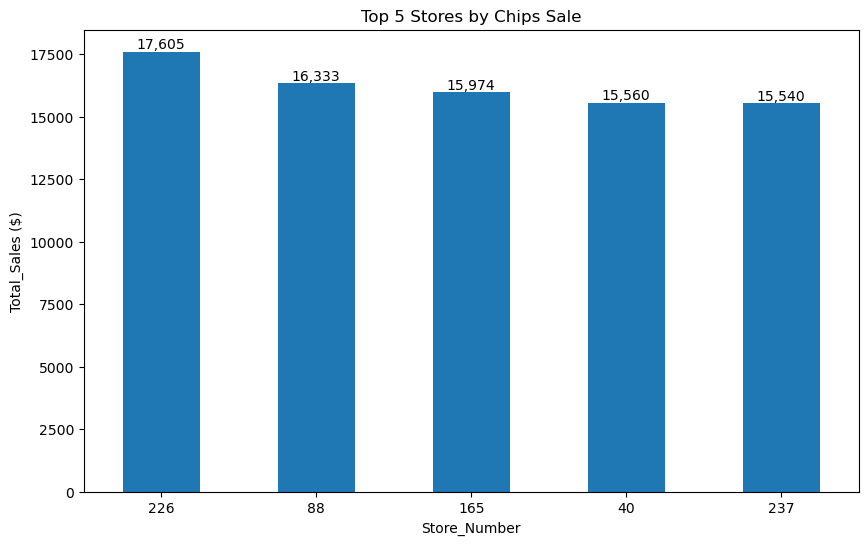

In [77]:
top_5_stores = df_chips.groupby('Store_Number')['Total_Sales'].sum().sort_values(ascending = False).head(5)
top_5_stores

top_5_stores_fig = top_5_stores.plot(kind = 'bar', figsize = (10,6))

plt.title('Top 5 Stores by Chips Sale')
plt.ylabel('Total_Sales ($)')
plt.xticks(rotation = 0)

for index, value in enumerate(top_5_stores):
    top_5_stores_fig.text(index, value, f'{value:,.0f}', ha="center", va="bottom")

plt.show()

### What are the top 5 products?

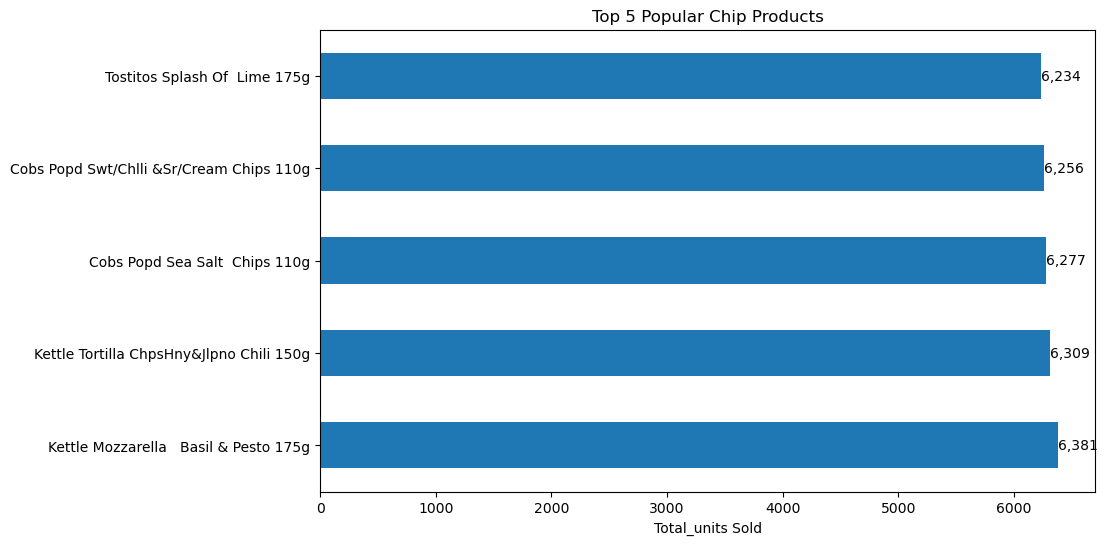

In [78]:
top_5_products = df_chips.groupby('Product_Name')['Product_Quantity'].sum().sort_values(ascending = False).head(5)

top_5_products_fig = top_5_products.plot(kind = 'barh', figsize = (10,6))

plt.title('Top 5 Popular Chip Products')
plt.xlabel('Total_units Sold')
plt.ylabel(None)

for index, value in enumerate(top_5_products):
    top_5_products_fig.text(value, index, f'{value:,.0f}', ha="left", va="center")

plt.show()

### What are the top 5 pack sizes and brands?

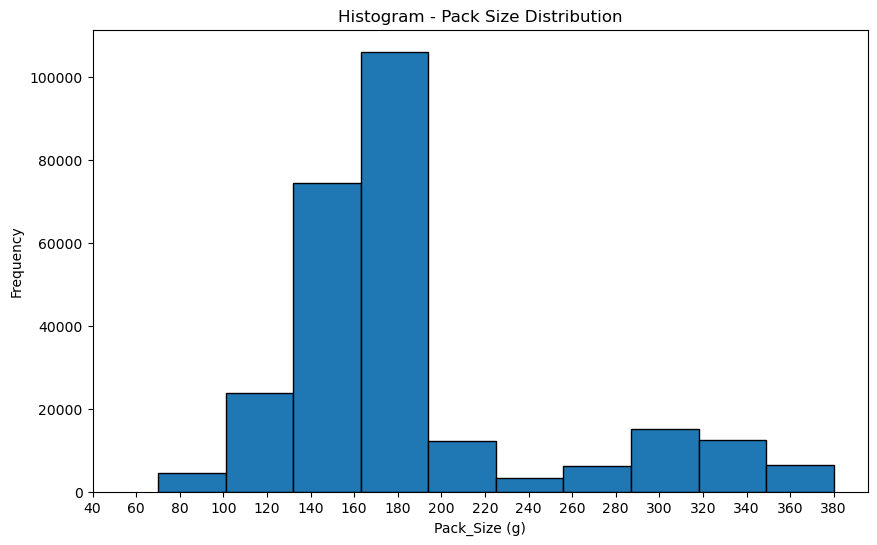

In [7]:
# Let's see the histogram of pack sizes to see how pack sizes are distributed
df_chips['Pack_Size'].plot(kind = 'hist', bins = 10, edgecolor = 'black', figsize = (10,6))

plt.xlabel('Pack_Size (g)')
plt.xticks(np.arange(40, 400, 20))
plt.title('Histogram - Pack Size Distribution')

plt.show()

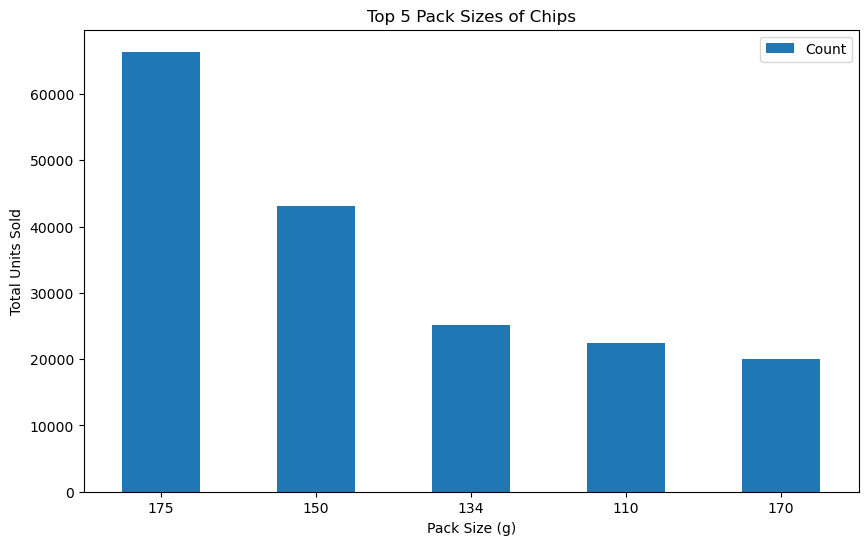

In [80]:
# lets create a bar chart for the top 5 pack sizes
top_5_pack_sizes = df_chips.groupby('Pack_Size', observed=False).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False).head(5)
top_5_pack_sizes = top_5_pack_sizes.set_index('Pack_Size')
top_5_pack_sizes

top_5_pack_sizes_fig = top_5_pack_sizes.plot(kind = 'bar', figsize = (10,6))

plt.title('Top 5 Pack Sizes of Chips')
plt.ylabel('Total Units Sold')
plt.xlabel('Pack Size (g)')
plt.xticks(rotation = 0)

# for index, value in enumerate(top_5_pack_sizes):
#     top_5_pack_sizes_fig.text(index, value, f'{value:,.0f}', ha="center", va="bottom")

plt.show()

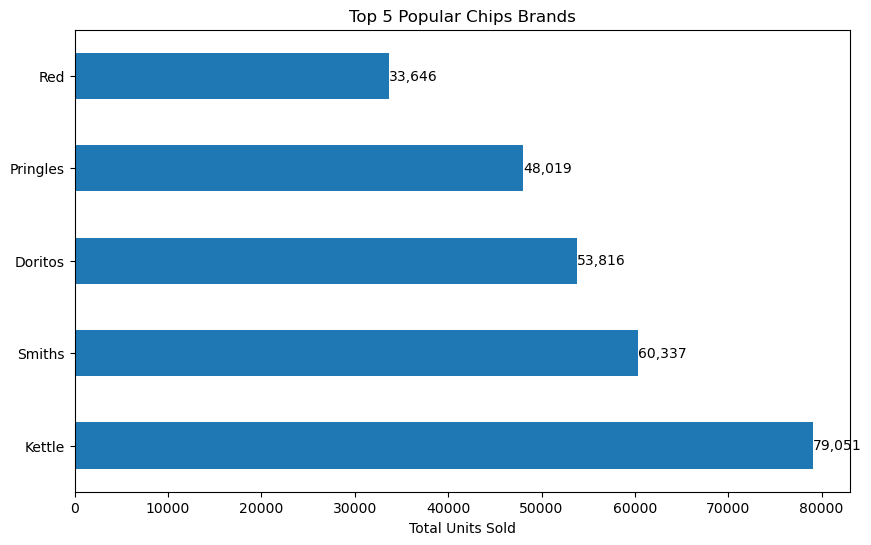

In [81]:
top_5_brands = df_chips.groupby('Brand_Name', observed=False)['Product_Quantity'].sum().sort_values(ascending=False).head(5)
top_5_brands

top_5_brands_fig = top_5_brands.plot(kind = 'barh', figsize = (10,6))

plt.title('Top 5 Popular Chips Brands')
plt.xlabel('Total Units Sold')
plt.ylabel(None)

for index, value in enumerate(top_5_brands):
    top_5_brands_fig.text(value, index, f'{value:,.0f}', ha="left", va="center")

plt.show()

### Which day of the week do customers to buy chips the most?

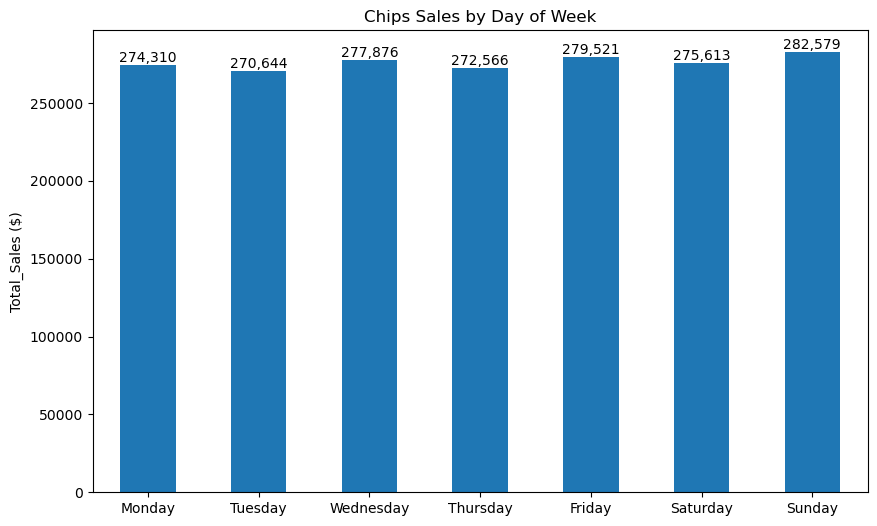

In [82]:
# Sort the day of the week first
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_chips['Day_Of_Week'] = pd.Categorical(df_chips['Day_Of_Week'], categories=day_order, ordered=True)

top_days = df_chips.groupby('Day_Of_Week', observed=False)['Total_Sales'].sum()

top_days_fig = top_days.plot(kind = 'bar', figsize = (10,6))

plt.title('Chips Sales by Day of Week')
plt.ylabel('Total_Sales ($)')
plt.xlabel(None)
plt.xticks(rotation = 0)

for index, value in enumerate(top_days):
    top_days_fig.text(index, value, f'{value:,.0f}', ha="center", va="bottom")

plt.show()

### How have chips sales been through out the months by customer type and family status? 

C:\Users\thang\AppData\Local\Temp\ipykernel_14256\2405591509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_sales_ct = df_chips.groupby([df_chips['Date'].dt.to_period('M'), 'Customer_Type'])['Total_Sales'].sum().unstack()


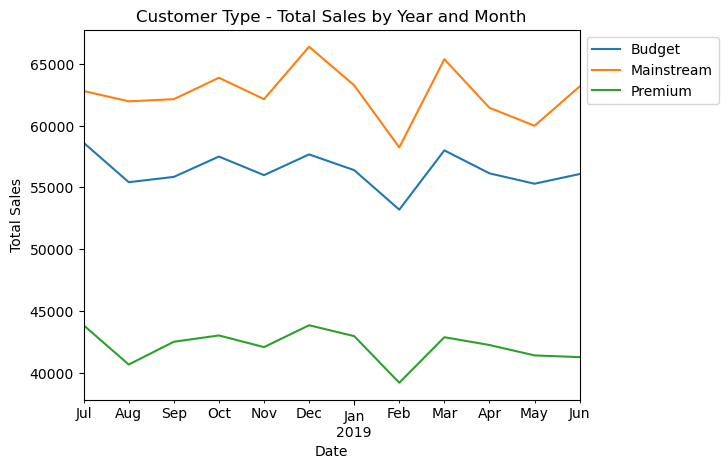

In [22]:
time_sales_ct = df_chips.groupby([df_chips['Date'].dt.to_period('M'), 'Customer_Type'])['Total_Sales'].sum().unstack()

time_sales_ct.plot(kind='line')

plt.title('Customer Type - Total Sales by Year and Month') 
plt.xlabel('Date') 
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

C:\Users\thang\AppData\Local\Temp\ipykernel_14256\1291255375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_sales_fs = df_chips.groupby([df_chips['Date'].dt.to_period('M'), 'Family_Status'])['Total_Sales'].sum().unstack()


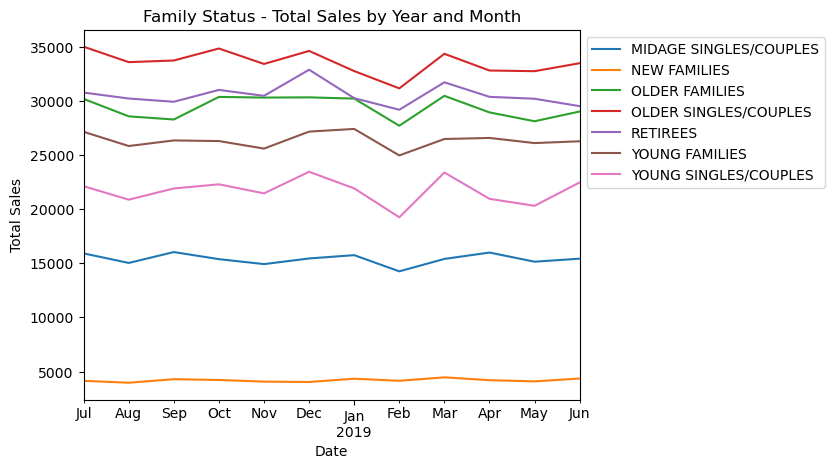

In [20]:
time_sales_fs = df_chips.groupby([df_chips['Date'].dt.to_period('M'), 'Family_Status'])['Total_Sales'].sum().unstack()

time_sales_fs.plot(kind='line')

plt.title('Family Status - Total Sales by Year and Month') 
plt.xlabel('Date') 
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

## COMPLEX QUESTIONS

### What are the customer distributions based on family status and customer type (customer segment)?

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


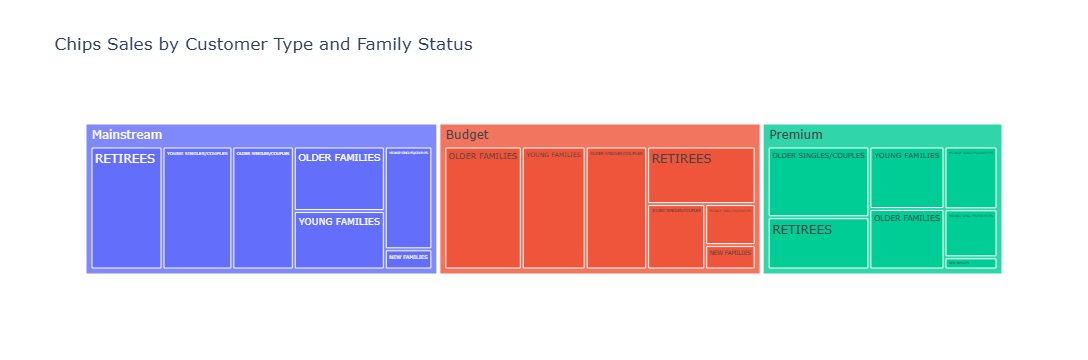

In [86]:
# What are the customer distributions based on family status and customer type (customer segment)?

customer_segment = df_chips.groupby(["Customer_Type", "Family_Status"], observed=True).size().reset_index(name='Count')

customer_segment['Count_Percent'] = (customer_segment ["Count"] / customer_segment ["Count"].sum() * 100).round(decimals = 2)

# Create a treemap using plotly.express
fig = px.treemap(
    customer_segment,
    path = ["Customer_Type", "Family_Status"], 
    values = "Count_Percent", 
    title="Chips Sales by Customer Type and Family Status"
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Customer Type: %{parent}<br>Family Status: %{label}<br>Count Percentage: %{value:.2f}%"
)

fig.show()

### What are the top product, pack size, and brand in each customer segment? 

In [87]:
product_segment = df_chips.groupby(["Customer_Type", "Family_Status",'Product_Name'], observed=False)['Product_Quantity'].sum().reset_index()
# product_segment['Percent'] = product_segment['Product_Quantity'] / product_segment['Product_Quantity'].sum() * 100
product_segment = product_segment.sort_values(["Customer_Type", "Family_Status",'Product_Quantity'], ascending = [True, True, False])
product_segment = product_segment.groupby(["Customer_Type", "Family_Status"], observed=False).head(1)
product_segment

Customer_Type           Family_Status  \
29          Budget  MIDAGE SINGLES/COUPLES   
146         Budget            NEW FAMILIES   
261         Budget          OLDER FAMILIES   
350         Budget   OLDER SINGLES/COUPLES   
487         Budget                RETIREES   
604         Budget          YOUNG FAMILIES   
778         Budget   YOUNG SINGLES/COUPLES   
875     Mainstream  MIDAGE SINGLES/COUPLES   
930     Mainstream            NEW FAMILIES   
1074    Mainstream          OLDER FAMILIES   
1170    Mainstream   OLDER SINGLES/COUPLES   
1276    Mainstream                RETIREES   
1425    Mainstream          YOUNG FAMILIES   
1515    Mainstream   YOUNG SINGLES/COUPLES   
1654       Premium  MIDAGE SINGLES/COUPLES   
1732       Premium            NEW FAMILIES   
1876       Premium          OLDER FAMILIES   
1952       Premium   OLDER SINGLES/COUPLES   
2080       Premium                RETIREES   
2176       Premium          YOUNG FAMILIES   
2289       Premium   YOUNG SINGLES/COUPLES   

                                  Product_Name  Product_Quantity  
29      Infzns Crn Crnchers Tangy Gcamole 110g               147  
146           Kettle Honey Soy    Chicken 175g                95  
261     Kettle Mozzarella   Basil & Pesto 175g               561  
350             Cobs Popd Sea Salt  Chips 110g               494  
487                         Kettle Chilli 175g               449  
604                       Kettle Original 175g               464  
778           Thins Chips Seasonedchicken 175g               218  
875   Smiths Crinkle Chips Salt & Vinegar 330g               369  
930                   Doritos Mexicana    170g                74  
1074  Old El Paso Salsa   Dip Chnky Tom Ht300g               356  
1170              Kettle 135g Swt Pot Sea Salt               539  
1276     Grain Waves         Sweet Chilli 210g               559  
1425          Pringles Sthrn FriedChicken 134g               322  
1515    Kettle Mozzarella   Basil & Pesto 175g               626  
1654              Pringles Sweet&Spcy BBQ 134g               221  
1732     Grain Waves         Sweet Chilli 210g                59  
1876       Pringles Chicken    Salt Crips 134g               290  
1952   Doritos Corn Chip Southern Chicken 150g               509  
2080  Infuzions Thai SweetChili PotatoMix 110g               374  
2176  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g               314  
2289    Cobs Popd Sour Crm  &Chives Chips 110g               162

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



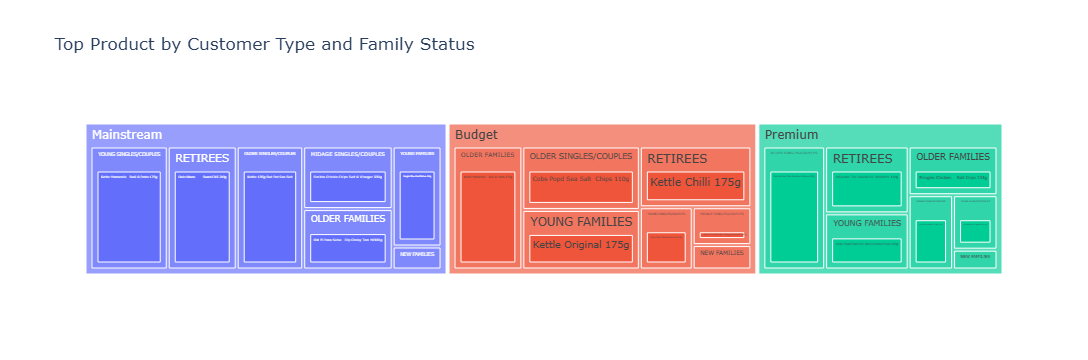

In [88]:
fig = px.treemap(
    product_segment,
    path = ["Customer_Type", "Family_Status", 'Product_Name'],
    values = 'Product_Quantity',
    title="Top Product by Customer Type and Family Status"
)

# fig.update_traces(
#      hovertemplate="<b>%{label}</b><br>Customer Type: %{parent}<br>Family Status: %{label}<br>Sales Percentage: %{value:.2f}%%<extra></extra>"
# )

fig.show()

In [89]:
pack_segment = df_chips.groupby(["Customer_Type", "Family_Status",'Pack_Size'], observed=False).size().reset_index(name='Count')
pack_segment = pack_segment.sort_values(["Customer_Type", "Family_Status",'Count'], ascending = [True, True, False])
pack_segment = pack_segment.groupby(["Customer_Type", "Family_Status"], observed=False).head(1)
pack_segment

Customer_Type           Family_Status  Pack_Size  Count
10         Budget  MIDAGE SINGLES/COUPLES        175   1277
31         Budget            NEW FAMILIES        175    777
52         Budget          OLDER FAMILIES        175   5808
73         Budget   OLDER SINGLES/COUPLES        175   4625
94         Budget                RETIREES        175   3847
115        Budget          YOUNG FAMILIES        175   4921
136        Budget   YOUNG SINGLES/COUPLES        175   2338
157    Mainstream  MIDAGE SINGLES/COUPLES        175   2975
178    Mainstream            NEW FAMILIES        175    589
199    Mainstream          OLDER FAMILIES        175   3588
220    Mainstream   OLDER SINGLES/COUPLES        175   4525
241    Mainstream                RETIREES        175   5295
262    Mainstream          YOUNG FAMILIES        175   3174
283    Mainstream   YOUNG SINGLES/COUPLES        175   4997
304       Premium  MIDAGE SINGLES/COUPLES        175   2082
325       Premium            NEW FAMILIES        175    376
346       Premium          OLDER FAMILIES        175   2816
367       Premium   OLDER SINGLES/COUPLES        175   4457
388       Premium                RETIREES        175   3306
409       Premium          YOUNG FAMILIES        175   2998
430       Premium   YOUNG SINGLES/COUPLES        175   1618

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



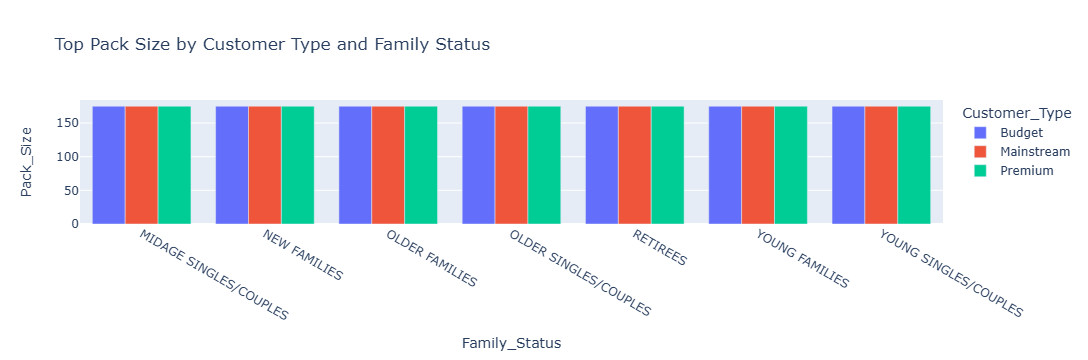

In [90]:
fig = px.bar(
    pack_segment,
    y = 'Pack_Size', 
    x = 'Family_Status', 
    color = 'Customer_Type',
    title="Top Pack Size by Customer Type and Family Status"
)

fig.update_layout(barmode = 'group')

fig.show()

In [91]:
brand_segment = df_chips.groupby(["Customer_Type", "Family_Status",'Brand_Name'], observed=False).size().reset_index(name='Count')
brand_segment = brand_segment.sort_values(["Customer_Type", "Family_Status",'Count'], ascending = [True, True, False])
brand_segment = brand_segment.groupby(["Customer_Type", "Family_Status"], observed=False).head(1)
brand_segment

Customer_Type           Family_Status Brand_Name  Count
9          Budget  MIDAGE SINGLES/COUPLES     Kettle    713
30         Budget            NEW FAMILIES     Kettle    510
51         Budget          OLDER FAMILIES     Kettle   3320
72         Budget   OLDER SINGLES/COUPLES     Kettle   3065
93         Budget                RETIREES     Kettle   2592
114        Budget          YOUNG FAMILIES     Kettle   2743
140        Budget   YOUNG SINGLES/COUPLES     Smiths   1245
156    Mainstream  MIDAGE SINGLES/COUPLES     Kettle   2136
177    Mainstream            NEW FAMILIES     Kettle    414
198    Mainstream          OLDER FAMILIES     Kettle   2019
219    Mainstream   OLDER SINGLES/COUPLES     Kettle   2835
240    Mainstream                RETIREES     Kettle   3386
261    Mainstream          YOUNG FAMILIES     Kettle   1789
282    Mainstream   YOUNG SINGLES/COUPLES     Kettle   3844
303       Premium  MIDAGE SINGLES/COUPLES     Kettle   1206
324       Premium            NEW FAMILIES     Kettle    247
350       Premium          OLDER FAMILIES     Smiths   1515
366       Premium   OLDER SINGLES/COUPLES     Kettle   2947
387       Premium                RETIREES     Kettle   2216
408       Premium          YOUNG FAMILIES     Kettle   1745
429       Premium   YOUNG SINGLES/COUPLES     Kettle    838

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



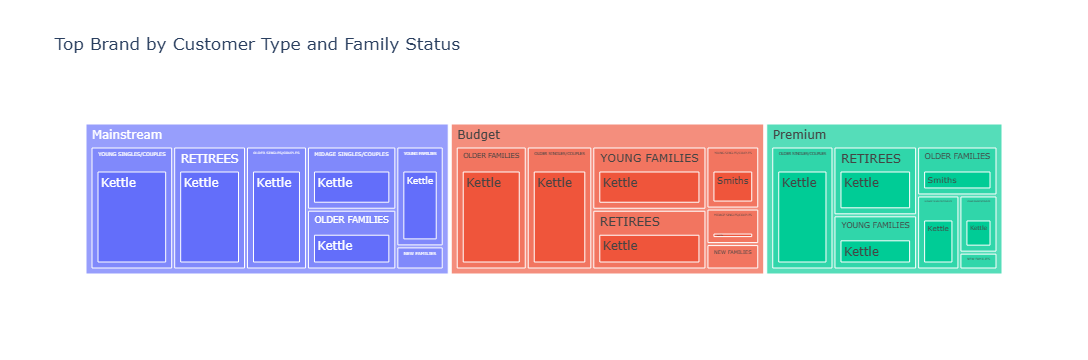

In [92]:
fig = px.treemap(
    brand_segment,
    path = ["Customer_Type", "Family_Status",'Brand_Name'], 
    values = "Count", 
    title="Top Brand by Customer Type and Family Status",
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Customer Type: %{parent}<br>Family Status: %{label}<br>Sales Percentage: %{value:.2f}%%<extra></extra>"
)

fig.show()

### Which customer segment spends the most?

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



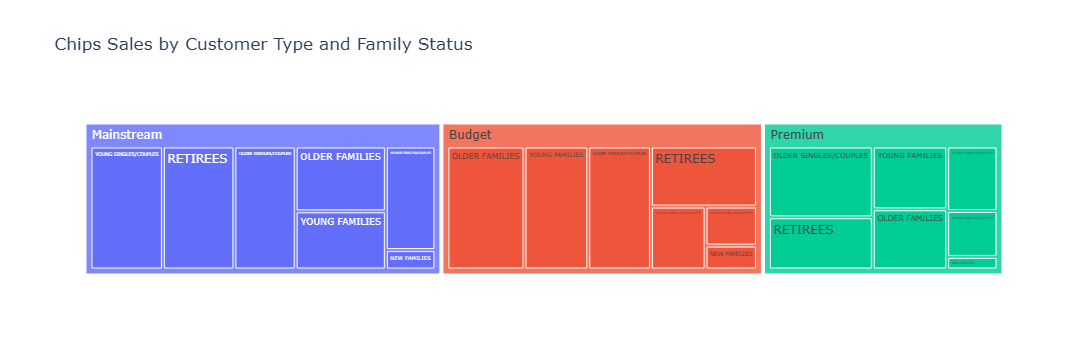

In [93]:
sales_segment = df_chips.groupby(["Customer_Type", "Family_Status"], observed=True)['Total_Sales'].sum().reset_index()

sales_segment['Sales_Percentage'] = (sales_segment ["Total_Sales"] / sales_segment ["Total_Sales"].sum() * 100).round(decimals = 2)

# Create a treemap using plotly.express
fig = px.treemap(
    sales_segment,
    path = ["Customer_Type", "Family_Status"], 
    values = "Sales_Percentage",
    title="Chips Sales by Customer Type and Family Status"
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Customer Type: %{parent}<br>Family Status: %{label}<br>Sales Percentage: %{value:.2f}%"
)

fig.show()

### How many chips are bought per customer segment? And what is the average chips price?

In [48]:
# avg_pq = df_chips.groupby(["Customer_Type", "Family_Status"], observed=False)['Product_Quantity'].mean().reset_index()
# avg_pq = avg_pq.sort_values(["Customer_Type", "Family_Status",'Product_Quantity'], ascending = [True, True, False]).round(2)
# avg_pq.rename(columns = {'Product_Quantity':'Average Product Quantity'}, inplace = True)

avg_pq

Loyalty_Card_Number          Family_Status Customer_Type       Date  \
0                      1000  YOUNG SINGLES/COUPLES       Premium 2018-10-17   
1                      1002  YOUNG SINGLES/COUPLES    Mainstream 2018-09-16   
2                      1003         YOUNG FAMILIES        Budget 2019-03-07   
3                      1003         YOUNG FAMILIES        Budget 2019-03-08   
4                      1004  OLDER SINGLES/COUPLES    Mainstream 2018-11-02   
...                     ...                    ...           ...        ...   
264828              2370701         YOUNG FAMILIES    Mainstream 2018-12-08   
264829              2370751         YOUNG FAMILIES       Premium 2018-10-01   
264830              2370961         OLDER FAMILIES        Budget 2018-10-24   
264831              2370961         OLDER FAMILIES        Budget 2018-10-27   
264832              2373711  YOUNG SINGLES/COUPLES    Mainstream 2018-12-14   

        Store_Number                              Product_Name  \
0                  1    Natural Chip        Compny SeaSalt175g   
1                  1     Red Rock Deli Chikn&Garlic Aioli 150g   
2                  1     Grain Waves Sour    Cream&Chives 210G   
3                  1    Natural ChipCo      Hony Soy Chckn175g   
4                  1            WW Original Stacked Chips 160g   
...              ...                                       ...   
264828            88     Grain Waves         Sweet Chilli 210g   
264829            88      Kettle Tortilla ChpsFeta&Garlic 150g   
264830            88   Tyrrells Crisps     Lightly Salted 165g   
264831            88  Old El Paso Salsa   Dip Chnky Tom Ht300g   
264832            88  Smiths Crinkle Chips Salt & Vinegar 330g   

        Product_Quantity  Total_Sales Day_Of_Week  Pack_Size  Brand_Name  \
0                      2          6.0   Wednesday        175     Natural   
1                      1          2.7      Sunday        150         Red   
2                      1          3.6    Thursday        210     GrnWves   
3                      1          3.0      Friday        175     Natural   
4                      1          1.9      Friday        160  Woolworths   
...                  ...          ...         ...        ...         ...   
264828                 2          7.2    Saturday        210     GrnWves   
264829                 2          9.2      Monday        150      Kettle   
264830                 2          8.4   Wednesday        165    Tyrrells   
264831                 2         10.2    Saturday        300         Old   
264832                 2         11.4      Friday        330      Smiths   

        Item_Price  Average_PQ  
0              3.0    6.948648  
1              2.7    6.948648  
2              3.6    6.948648  
3              3.0    6.948648  
4              1.9    6.948648  
...            ...         ...  
264828         3.6    6.948648  
264829         4.6    6.948648  
264830         4.2    6.948648  
264831         5.1    6.948648  
264832         5.7    6.948648  

[264833 rows x 13 columns]

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


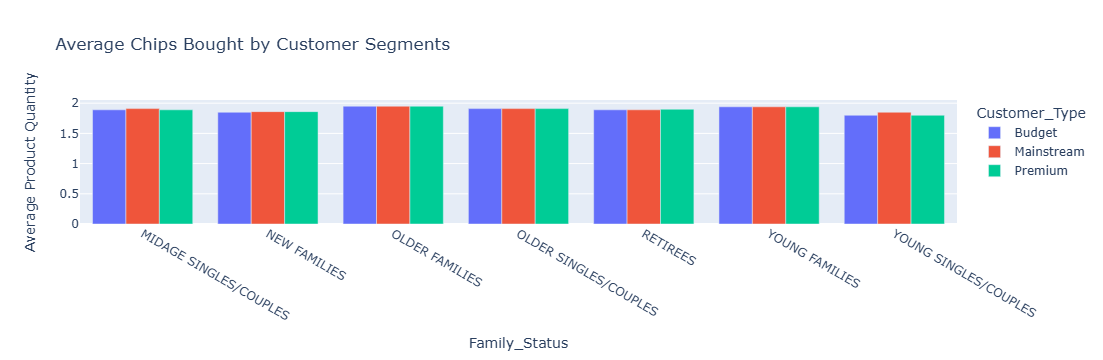

In [44]:
fig = px.bar(
    avg_pq,
    x = 'Family_Status',
    y = 'Average Product Quantity',
    color = 'Customer_Type',
    title = 'Average Chips Bought by Customer Segments'
)
fig.update_layout(barmode='group')

fig.show()

In [96]:
# How many chips are bought per customer segment? And what is the average chips price?
avg_price = df_chips.groupby(["Customer_Type", "Family_Status"], observed=False)['Item_Price'].mean().reset_index()
avg_price = avg_price.sort_values(["Customer_Type", "Family_Status",'Item_Price'], ascending = [True, True, False]).round(2)
avg_price.rename(columns = {'Item_Price':'Average_Chip_Price'}, inplace = True)

avg_price

Customer_Type           Family_Status  Average_Chip_Price
0         Budget  MIDAGE SINGLES/COUPLES                3.73
1         Budget            NEW FAMILIES                3.92
2         Budget          OLDER FAMILIES                3.73
3         Budget   OLDER SINGLES/COUPLES                3.88
4         Budget                RETIREES                3.92
5         Budget          YOUNG FAMILIES                3.75
6         Budget   YOUNG SINGLES/COUPLES                3.64
7     Mainstream  MIDAGE SINGLES/COUPLES                4.00
8     Mainstream            NEW FAMILIES                3.92
9     Mainstream          OLDER FAMILIES                3.73
10    Mainstream   OLDER SINGLES/COUPLES                3.80
11    Mainstream                RETIREES                3.83
12    Mainstream          YOUNG FAMILIES                3.71
13    Mainstream   YOUNG SINGLES/COUPLES                4.07
14       Premium  MIDAGE SINGLES/COUPLES                3.75
15       Premium            NEW FAMILIES                3.87
16       Premium          OLDER FAMILIES                3.70
17       Premium   OLDER SINGLES/COUPLES                3.89
18       Premium                RETIREES                3.92
19       Premium          YOUNG FAMILIES                3.75
20       Premium   YOUNG SINGLES/COUPLES                3.65

C:\Users\thang\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



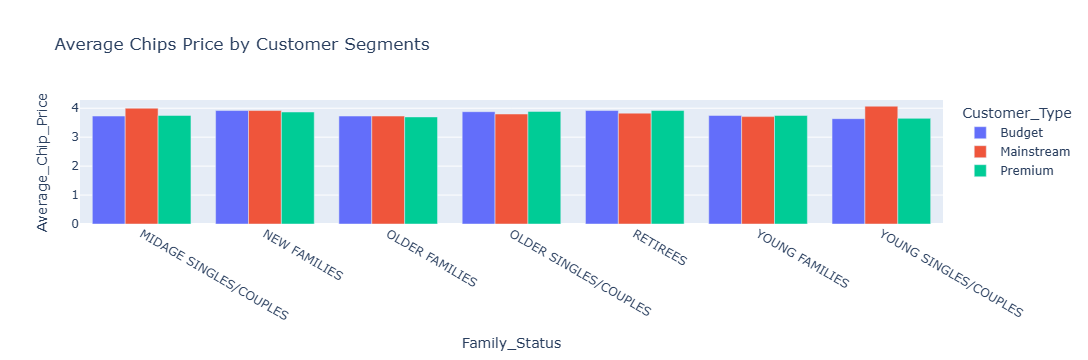

In [97]:
fig = px.bar(
    avg_price,
    x = 'Family_Status',
    y = 'Average_Chip_Price',
    color = 'Customer_Type',
    title = 'Average Chips Price by Customer Segments'
)
fig.update_layout(barmode='group')

fig.show()

In [58]:
# Determine the significance of difference between the average price of mainstream midage & young singles/couples vs. non-mainstream counterparts
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

mainstream = df_chips[(df_chips['Customer_Type']=='Mainstream') & (df_chips['Family_Status'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))]['Item_Price']
non_mainstream = df_chips[(df_chips['Customer_Type']!='Mainstream') & (df_chips['Family_Status'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))]['Item_Price']

t_stat, p_value = ttest_ind(mainstream,non_mainstream, alternative='greater')
    
print(f"Two-Sample Independent t-test: t-statistic = {t_stat}, p-value = {p_value:2e}")

Two-Sample Independent t-test: t-statistic = 40.83413678791155, p-value = 0.000000e+00


In [123]:
# Deep dive into Mainstream, young singles/couples
segment1 = df_chips[(df_chips['Family_Status'] == 'YOUNG SINGLES/COUPLES') & (df_chips['Customer_Type'] == 'Mainstream')]
other = df_chips[~((df_chips['Family_Status'] == 'YOUNG SINGLES/COUPLES') & (df_chips['Customer_Type'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['Product_Quantity'].sum()
quantity_other = other['Product_Quantity'].sum()

quantity_segment1_by_brand = segment1.groupby('Brand_Name')['Product_Quantity'].sum().reset_index()
quantity_segment1_by_brand['Target_Segment'] = quantity_segment1_by_brand['Product_Quantity'] / quantity_segment1

quantity_other_by_brand = other.groupby('Brand_Name')['Product_Quantity'].sum().reset_index()
quantity_other_by_brand['Other'] = quantity_other_by_brand['Product_Quantity'] / quantity_other

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='Brand_Name')
brand_proportions['Affinity_To_Brand'] = brand_proportions['Target_Segment'] / brand_proportions['Other']

# Sort by affinityToBrand in descending order
brand_proportions = brand_proportions.sort_values(by='Affinity_To_Brand', ascending=False)

pd.set_option('display.precision', 10)  # Set the precision to 10 decimal places

brand_proportions.set_index('Brand_Name', inplace = True)

brand_proportions[['Target_Segment','Other','Affinity_To_Brand']]

C:\Users\thang\AppData\Local\Temp\ipykernel_10132\904116189.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\thang\AppData\Local\Temp\ipykernel_10132\904116189.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Target_Segment  Other  Affinity_To_Brand
Brand_Name                                          
Tyrrells              0.03   0.02               1.24
Twisties              0.04   0.04               1.23
Kettle                0.19   0.15               1.20
Tostitos              0.04   0.04               1.20
Old                   0.04   0.03               1.20
Pringles              0.11   0.09               1.19
Doritos               0.12   0.11               1.17
Cobs                  0.04   0.04               1.15
Infuzions             0.06   0.05               1.14
Thins                 0.06   0.05               1.07
GrnWves               0.03   0.03               1.06
Cheezels              0.02   0.02               0.97
Smiths                0.09   0.12               0.77
French                0.00   0.01               0.69
Cheetos               0.01   0.01               0.67
Red                   0.05   0.07               0.66
Natural               0.02   0.03               0.64
CCs                   0.01   0.02               0.60
Sunbites              0.01   0.01               0.51
Woolworths            0.03   0.06               0.49
Burger                0.00   0.01               0.45

In [135]:
# Deep dive into Mainstream, young singles/couples
segment1 = df_chips[(df_chips['Family_Status'] == 'YOUNG SINGLES/COUPLES') & (df_chips['Customer_Type'] == 'Mainstream')]
other = df_chips[~((df_chips['Family_Status'] == 'YOUNG SINGLES/COUPLES') & (df_chips['Customer_Type'] == 'Mainstream'))]

# Preferred pack size compared to the rest of the population
quantity_segment1 = segment1['Product_Quantity'].sum()
quantity_other = other['Product_Quantity'].sum()

quantity_segment1_by_pack = segment1.groupby('Pack_Size')['Product_Quantity'].sum().reset_index()
quantity_segment1_by_pack['Target_Segment'] = quantity_segment1_by_pack['Product_Quantity'] / quantity_segment1

quantity_other_by_pack = other.groupby('Pack_Size')['Product_Quantity'].sum().reset_index()
quantity_other_by_pack['Other'] = quantity_other_by_pack['Product_Quantity'] / quantity_other

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='Pack_Size')
pack_proportions['Affinity_To_Pack'] = pack_proportions['Target_Segment'] / pack_proportions['Other']

# Sort by affinityToPack in descending order
pack_proportions = pack_proportions.sort_values(by='Affinity_To_Pack', ascending=False)

pack_proportions.set_index('Pack_Size', inplace=True)

pack_proportions[['Target_Segment','Other','Affinity_To_Pack']]

Target_Segment  Other  Affinity_To_Pack
Pack_Size                                         
270                  0.03   0.02              1.28
380                  0.03   0.02              1.27
330                  0.06   0.05              1.23
134                  0.11   0.09              1.19
110                  0.10   0.08              1.19
210                  0.03   0.02              1.17
135                  0.01   0.01              1.14
250                  0.01   0.01              1.13
170                  0.08   0.08              1.00
300                  0.05   0.06              0.96
175                  0.24   0.25              0.95
150                  0.16   0.16              0.95
165                  0.05   0.06              0.90
190                  0.01   0.01              0.61
180                  0.00   0.01              0.60
160                  0.01   0.01              0.52
90                   0.01   0.01              0.51
125                  0.00   0.01              0.50
200                  0.01   0.02              0.48
70                   0.00   0.01              0.48
220                  0.00   0.01              0.45

### Summary

Basic 
- Which are the top 5 stores?
  
<p style='color: red'> 
Store# 226 <br>
Store# 88 <br>
Store# 165 <br>
Store# 40 <br>
Store# 237 <br>
</p>

- What are the top 5 products?

<p style='color: red'>
Kettle Mozzarella Basil & Pesto 175g <br>Kettle Tortilla Chips Honey & Jalapeno Chilli 150g <br>Cobs Pop'd Sea Salt 110g <br>Cobs Pop'd Sweet Chilli & Sour Cream Chips 110g <br>Tostitos Splash Of Lime 175g <br></p>



  
- What are the3top 5 pack sizes and br
  
<p style='color: red'> 
Pack Sizes: <br>
175g <br>
150 <br>g
134<br>
Brands: <br>
Kettle <br>
Smith <br>s
Dorit <br>o</p>
d170g
  nds? 
- Which day of week do customers buy ch <br>
<p style='color: red'> 
Sundayi</p>
ps the most?

Complex
- top 3 What are the customer distributions based on family status and customer type (custo

<p style='color: red'> 
8.75% Budget Older Families <br>
8.11% Mainstream Retirees <br>
7.87% Mainstream Young Single / Couples <br>
</p>
mer segment)?
- Whaare the op 3 producs, pack sizs, and brtop ands in each cust

<p style='color: red'> 
Products: <br>
Kettle Mozzarella Basil & Pesto 175g <br>
Grain Waves Sweet Chili 210g <br>

Pack Sizes: <br>
175g <br>

Brands: <br>
Kettle <br>
</p>
mer segment? 
- Which customer segment spe <br>
<p style='color: red'> 
8.71% Budget Older Families
</p>
nds the most?
- How many chips are bought per customer segment? And what is the average

   chips price?
- What is the proprotion that customers spend on chips from their total grocery budget?

Sales have mainly been due to: <strong>Budget - Older Families</strong>, <strong>Mainstream - Young Singles/Couples</strong>, and <strong>Mainstream- Retirees </strong> shoppers. <br>I found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. <br> Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. <br>
I’ve also found that Mainstream young singles and couples are <strong>23%</strong> more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.r